<a href="https://colab.research.google.com/github/khalidjoulid/Image-classification-using-CNN/blob/main/Convolutional-Neural-Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Accès à la BD MNIST

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_test_1=x_test

In [ ]:
np.shape(x_test) # 10000 images de taille 28*28

(10000, 28, 28)

In [ ]:
np.shape(y_test)

(10000,)

**Visualisation**

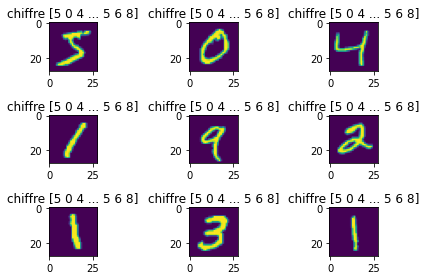

In [ ]:
fig=plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout() # l'espace
  plt.imshow(x_train[i]) # affichage des images
  plt.title("chiffre {}".format(y_train)) # affichage des titres



## Transformations

Transformation des images (Matrices 28x28) en des vecteurs (784)

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [ ]:
np.shape(x_test)

(10000, 784)

In [ ]:
x_train[0] # le premier vecteur

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Normalisation

In [ ]:
#x_train=x_train/255 # il faut travailler avec des nombres réels
#x_test=x_test/255

x_train=x_train.astype('float')
x_test=x_test.astype('float')
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Transformation des labels

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train[0]

5

In [ ]:
from keras.utils import np_utils

y_train_1=y_train
y_test_1=y_test
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

def NAN():
   model=Sequential()
   #architecture
   model.add(Dense(512,activation="relu", input_shape=(784,))) # ajouter une couche cauchée composée de 3 neurones
   model.add(Dense(512,activation="relu")) 
   model.add(Dense(10,activation="softmax"))
   return model

Compilation

In [ ]:
model=NAN()
model.compile(loss = "categorical_crossentropy", optimizer ='adam',metrics = ["accuracy"])

Apprentissage

In [ ]:
h=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3225 - accuracy: 0.9076 - val_loss: 0.5340 - val_accuracy: 0.9367
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2927 - accuracy: 0.9549 - val_loss: 0.3414 - val_accuracy: 0.9517
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1735 - accuracy: 0.9672 - val_loss: 0.2848 - val_accuracy: 0.9514
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1268 - accuracy: 0.9740 - val_loss: 0.2439 - val_accuracy: 0.9617
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1042 - accuracy: 0.9769 - val_loss: 0.2479 - val_accuracy: 0.9601
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1031 - accuracy: 0.9777 - val_loss: 0.2498 - val_accuracy: 0.9641
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9803 - val_loss: 0.2126 - val_accuracy: 0.9630
Epoch 

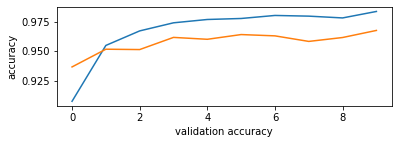

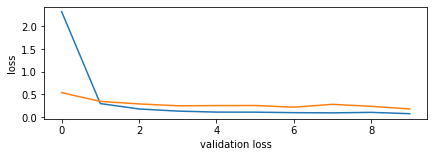

In [ ]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("validation accuracy")
fig=plt.figure()

plt.subplot(2,1,1)
plt.plot(h.history["loss"])
plt.plot(h.history[ "val_loss"])
plt.ylabel("loss")
plt.xlabel("validation loss")
plt.tight_layout()

In [ ]:
predi_test=model.predict_classes(x_test)

In [ ]:
predi_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test_1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

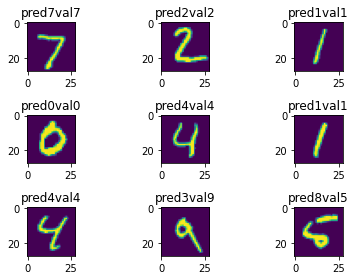

In [ ]:
fig=plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout() # pour faire lespace
  plt.imshow(x_test_1[i]) #affichage des images 
  plt.title(f'pred{predi_test[i]}val{y_test_1[i]}') # affichage de titre